In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os

extracted_folder = 'data_csv/'
dataframes = []
for filename in os.listdir(extracted_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(extracted_folder, filename)
        dataf = pd.read_csv(file_path)
        
        crypto_name = filename.replace('.csv', '')
        dataf['Crypto Name'] = crypto_name
        dataframes.append(dataf)

df = pd.concat(dataframes, ignore_index=True)
df
df[df["Crypto Name"]=="bitcoin" ]

,Date,Open,High,Low,Close,Volume,Currency,Crypto Name
14159,2010-07-18,0.0,0.1,0.1,0.1,75.0,USD,bitcoin
14160,2010-07-19,0.1,0.1,0.1,0.1,574.0,USD,bitcoin
14161,2010-07-20,0.1,0.1,0.1,0.1,262.0,USD,bitcoin
14162,2010-07-21,0.1,0.1,0.1,0.1,575.0,USD,bitcoin
14163,2010-07-22,0.1,0.1,0.1,0.1,2160.0,USD,bitcoin
...,...,...,...,...,...,...,...,...
18574,2022-08-19,23201.6,23202.3,20807.8,20831.3,339472.0,USD,bitcoin
18575,2022-08-20,20830.7,21357.4,20784.8,21138.9,206943.0,USD,bitcoin
18576,2022-08-21,21138.9,21692.4,21077.4,21517.2,177522.0,USD,bitcoin
18577,2022-08-22,21516.8,21517.4,20912.1,21416.3,251833.0,USD,bitcoin


## Le Bitcoin

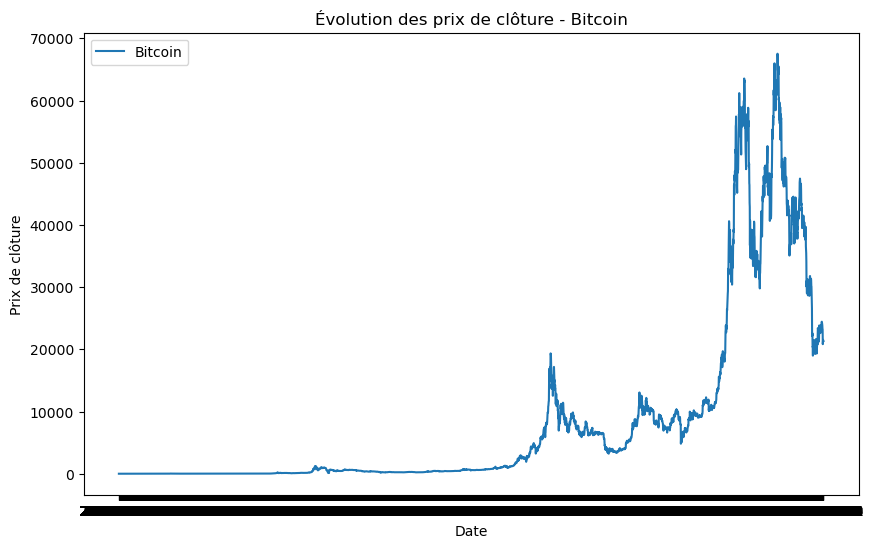

In [10]:
bitcoin_data = df[df["Crypto Name"] == "bitcoin"]
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Bitcoin')
plt.title('Évolution des prix de clôture - Bitcoin')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()


Le BTC a toujours eu une valeur très volatile, pouvant tripler, voire plus, en un an, comme s'effondrer et être divisée par 4 ou 5.

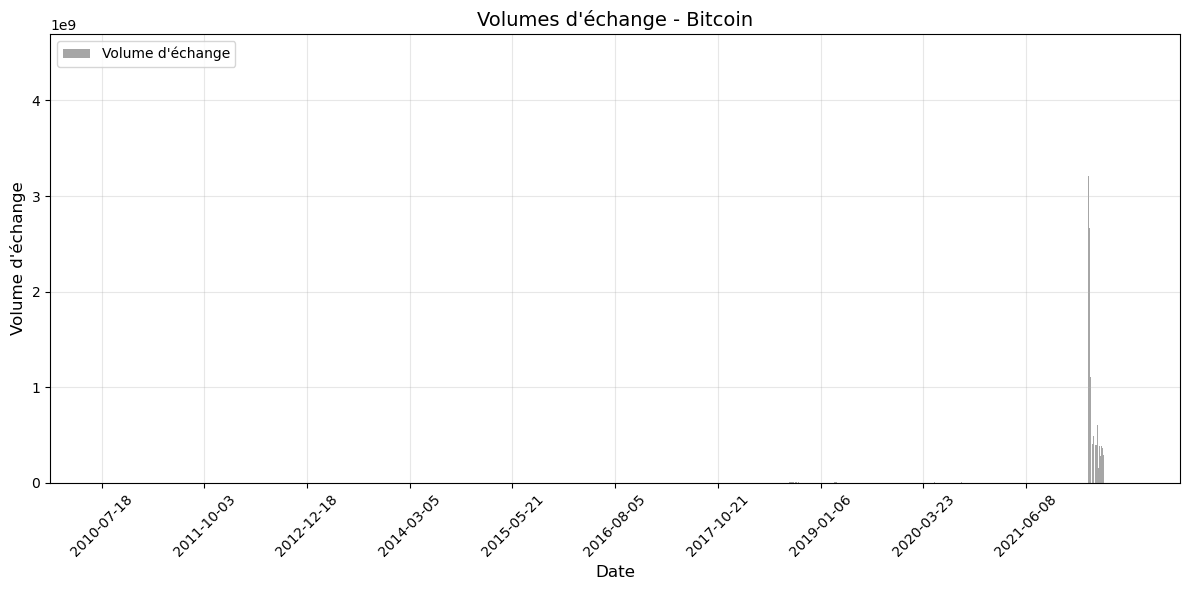

In [11]:
bitcoin_data = df[df["Crypto Name"] == "bitcoin"]
plt.figure(figsize=(12, 6))
plt.bar(bitcoin_data['Date'], bitcoin_data['Volume'], color='gray', alpha=0.7, label='Volume d\'échange')
plt.xticks(ticks=bitcoin_data['Date'][::len(bitcoin_data)//10], rotation=45, fontsize=10)
plt.title('Volumes d\'échange - Bitcoin', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume d\'échange', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Ce graphique illustre l'évolution des volumes d'échange pour le Bitcoin sur une période donnée. Il met en évidence les corrélations possibles entre les variations de prix et les pics d'activité, représentés par des volumes élevés. Les volume d'échange ne sont même pas visible lorsque le prix du BTC est très bas et ressortes en faisant des pics lorsque très haut. Ce type de visualisation est essentiel pour analyser les dynamiques du marché et identifier les périodes de forte volatilité.

C:\Users\pablo\AppData\Local\Temp\ipykernel_14608\225137256.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])


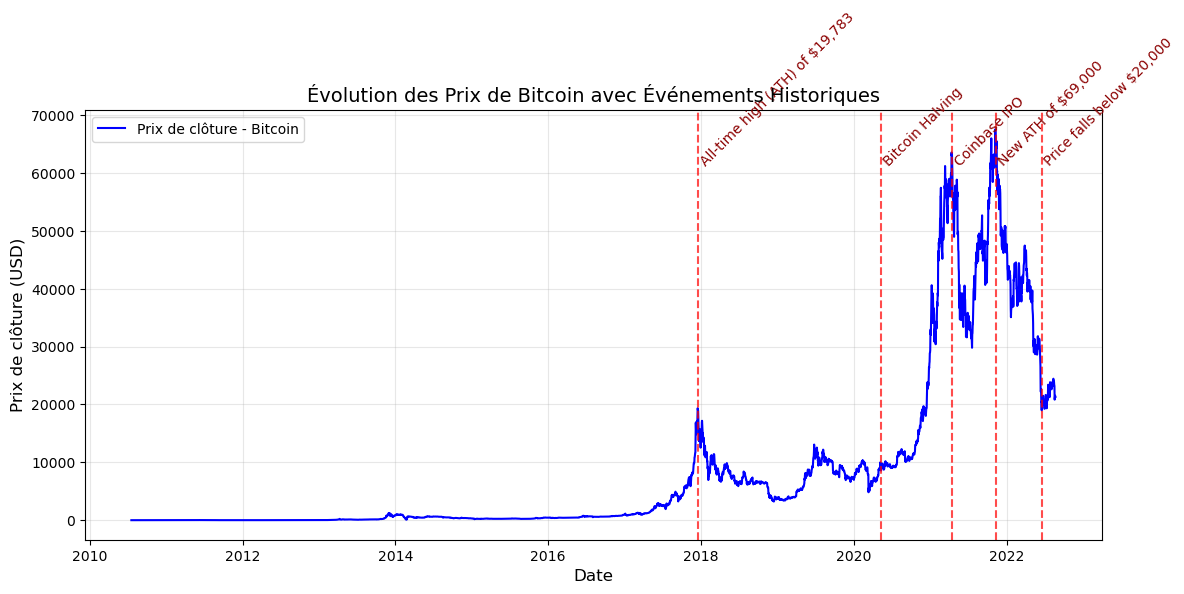

In [12]:
extracted_folder = 'data_csv/'
dataframes = []

for filename in os.listdir(extracted_folder):
    if filename.endswith('.csv'):
        file_path = os.path.join(extracted_folder, filename)
        dataf = pd.read_csv(file_path)
        
        crypto_name = filename.replace('.csv', '')
        dataf['Crypto Name'] = crypto_name
        dataframes.append(dataf)

df = pd.concat(dataframes, ignore_index=True)

bitcoin_data = df[df["Crypto Name"] == "bitcoin"]

bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])

events = [
    {"Date": "2017-12-17", "Event": "All-time high (ATH) of $19,783"},
    {"Date": "2020-05-11", "Event": "Bitcoin Halving"},
    {"Date": "2021-04-14", "Event": "Coinbase IPO"},
    {"Date": "2021-11-10", "Event": "New ATH of $69,000"},
    {"Date": "2022-06-18", "Event": "Price falls below $20,000"},
]

events_df = pd.DataFrame(events)
events_df['Date'] = pd.to_datetime(events_df['Date'])

plt.figure(figsize=(12, 6))

plt.plot(bitcoin_data['Date'], bitcoin_data['Close'], label='Prix de clôture - Bitcoin', color='blue')

for _, row in events_df.iterrows():
    plt.axvline(x=row['Date'], color='red', linestyle='--', alpha=0.7)  # Ligne verticale
    plt.text(row['Date'], bitcoin_data['Close'].max() * 0.9, row['Event'],
             rotation=45, verticalalignment='bottom', fontsize=10, color='darkred')

plt.title("Évolution des Prix de Bitcoin avec Événements Historiques", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Prix de clôture (USD)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


Les mouvements majeurs du BTC sont souvent dus à des événements historiques qui impactent fortement son utilisation ou sa disponibilité. Le Bitcoin a d'abord fait parler de lui dans les médias en 2017, atteignant rapidement un premier pic de valeur à plus de 19 000 dollars. Ensuite, le prix chuta puis stagna jusqu'au halving de 2020, où sa valeur monta en flèche, dépassant la barre symbolique des 50 000 dollars. Peu de temps après, Coinbase, l'une des principales plateformes d'achat de cryptomonnaies, entra en bourse (Coinbase IPO), ce qui permit au Bitcoin d'atteindre un sommet historique de 69 000 dollars. Cependant, avec une actualité relativement vide et aucun événement majeur jusqu'en 2023, le prix du BTC a chuté pour revenir à 20 000 dollars.